In [1]:
from note_reader import get_notes_as_pitch_classes
from wv_utils import create_angle_matrix
from gensim.models import FastText
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob

In [2]:
plt.rcParams["font.family"] = ["Times"]
UNK_TAG = "<UNK>"
file_list = glob.glob("data/txt/*.txt")

In [3]:
docs, counts = get_notes_as_pitch_classes(file_list, makam="nihavent")

In [4]:
counts.most_common()

[('D', 10493),
 ('G', 8833),
 ('A#4', 7567),
 ('A', 7324),
 ('C', 6747),
 ('D#4', 5662),
 ('F', 3273),
 ('F#4', 2651),
 ('C#4', 442),
 ('B', 306),
 ('D#8', 304),
 ('E', 241),
 ('A#8', 132),
 ('D#5', 96),
 ('G#4', 71),
 ('F#5', 67),
 ('C#5', 32),
 ('G#5', 16),
 ('A#5', 11)]

In [5]:
ft_model = FastText(sentences=docs, vector_size=8,
                    epochs=250, window=5, seed=42)
wv = ft_model.wv
wv.most_similar(positive=["C", "D"], negative=["G"])  # D#4

[('D#4', 0.5245431661605835),
 ('B', 0.2719733417034149),
 ('F', 0.22258594632148743),
 ('G#4', 0.13742075860500336),
 ('A#4', 0.10054416209459305),
 ('C#5', 0.053088124841451645),
 ('C#4', -0.02934192679822445),
 ('F#5', -0.07164788991212845),
 ('E', -0.08858246356248856),
 ('D#8', -0.14372004568576813)]

In [6]:
angles_dict = create_angle_matrix(wv)
df_nihavent = pd.DataFrame.from_dict(angles_dict)
df_nihavent.to_excel("results/angles_nihavent.xlsx")

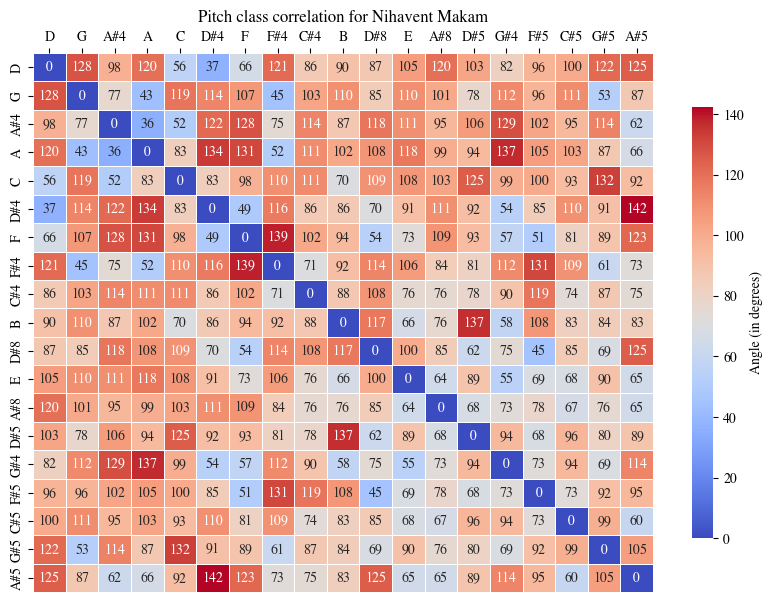

In [7]:
fig, ax = plt.subplots(figsize=(10, 7))
hm = sns.heatmap(df_nihavent, cmap="coolwarm", annot=True,
                 fmt=",.0f", linewidths=0.5, cbar_kws={"shrink": 0.8})
hm.set(title="Pitch class correlation for Nihavent Makam")
ax.collections[0].colorbar.set_label("Angle (in degrees)")
ax.xaxis.tick_top()
plt.show()
fig.savefig("results/nihavent_corr.pdf")